# Market Overview

In this notebook, we'll take a look at the market as a whole using Fidap.

In [9]:
import pandas as pd
from fidap import fidap_client
import config

In [10]:
fidap = fidap_client(api_key=config.FIDAP_API_KEY)

## Aggregate statistics

First, let's get some aggregate statistics - how many companies there are, the total market cap, and the historical average volume.

In [17]:
df_market = fidap.sql("""select count(*) number_tickers,
             sum("marketcap") / 1e12 marketcap_tr,
             sum("revenueusd") / 1e12 revenue_tr
             from "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."tickers";""")

In [30]:
values = df_market.values.tolist()[0]
print(f"""
The US Market Has the Following:
# of Tickers: {int(values[0])}
Marketcap: ${round(values[1],2)}Tn
Revenue: ${round(values[2],2)}Tn
""")


The US Market Has the Following:
# of Tickers: 6256
Marketcap: $49.55Tn
Revenue: $5.44Tn



## Statistics By Exchange

### Overview

In [59]:
df_exchange_ov = fidap.sql("""select "exchange", count(*) as "count", ROUND(sum("revenueusd")/1e12,3) revenue_usd_trillion, ROUND(sum("marketcap")/1e12,3) marketcap_usd_trillion from "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."tickers" GROUP BY "exchange" ORDER BY "count" DESC;""")
df_exchange_ov

,exchange,count,revenue_usd_trillion,marketcap_usd_trillion
0,NASDAQ,3403,1.463,21.041
1,NYSE,2182,3.933,28.340
2,OTC,430,0.028,0.046
3,NYSEMKT,238,0.018,0.108
4,BATS,2,0.001,0.011
5,NYSEARCA,1,0.000,0.000


### MarketCap

<AxesSubplot:title={'center':'Marketcap by Exchange'}, ylabel='marketcap_usd_trillion'>

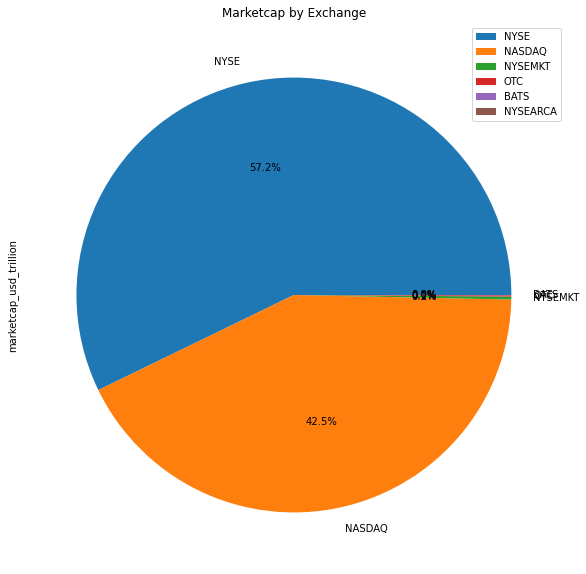

In [29]:
df_exchange = fidap.sql("""select "exchange", ROUND(sum("marketcap")/1e12,3) marketcap_usd_trillion from "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."tickers" GROUP BY "exchange";""")
df_exchange.set_index("exchange", inplace=True)
df_exchange.plot.pie(y='marketcap_usd_trillion', figsize=(10,10), title="Marketcap by Exchange", autopct='%1.1f%%')

### Revenue

<AxesSubplot:title={'center':'Revenue by Exchange'}, ylabel='revenue_usd_trillion'>

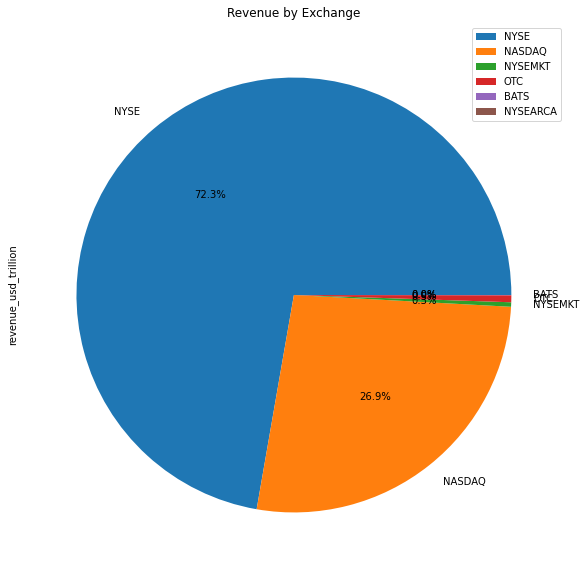

In [33]:
df_exchange_rev = fidap.sql("""select "exchange", ROUND(sum("revenueusd")/1e12,3) revenue_usd_trillion from "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."tickers" GROUP BY "exchange";""")
df_exchange_rev.set_index("exchange", inplace=True)
df_exchange_rev.plot.pie(y='revenue_usd_trillion', figsize=(10,10), title="Revenue by Exchange", autopct='%1.1f%%')

## Statistics by Location

### Overview

In [57]:
df_loc_overview = fidap.sql("""select "location", COUNT(*) as "count", ROUND(sum("revenueusd")/1e9,3) "revenue_usd_billion",ROUND(sum("marketcap")/1e9,3) "marketcap_usd_billion" from "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."tickers" WHERE "marketcap" IS NOT NULL GROUP BY "location" ORDER BY "count" DESC LIMIT 10;""")
df_loc_overview

,location,count,revenue_usd_billion,marketcap_usd_billion
0,California; U.S.A,794,628.110,13347.090
1,New York; U.S.A,504,393.865,4472.712
2,Texas; U.S.A,435,451.005,2380.115
3,Massachusetts; U.S.A,287,120.517,1714.851
4,Florida; U.S.A,201,95.049,928.660
5,Pennsylvania; U.S.A,191,182.282,1119.258
6,Illinois; U.S.A,165,236.762,1917.768
7,New Jersey; U.S.A,164,105.665,1266.726
8,Ohio; U.S.A,118,201.280,1113.097
9,Colorado; U.S.A,114,58.912,422.348


### Top 10 Marketcap

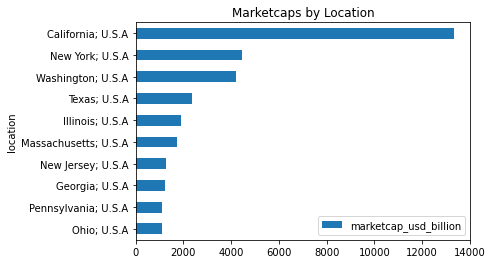

In [52]:
df_location = fidap.sql("""select "location", ROUND(sum("marketcap")/1e9,3) "marketcap_usd_billion" from "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."tickers" WHERE "marketcap" IS NOT NULL GROUP BY "location" ORDER BY "marketcap_usd_billion" DESC LIMIT 10;""")
df_location.set_index("location", inplace=True)
ax = df_location.plot.barh(y="marketcap_usd_billion", title="Marketcaps by Location")
ax.invert_yaxis()

### Top 10 Revenue

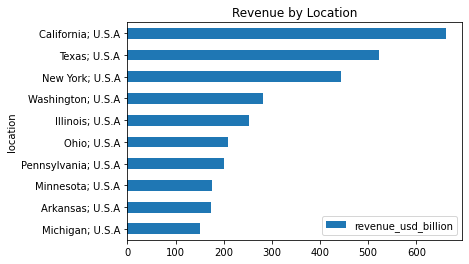

In [53]:
df_location_rev = fidap.sql("""select "location", ROUND(sum("revenueusd")/1e9,3) "revenue_usd_billion" from "FIDAP_DATA_SOURCES"."FIDAP_SCHEMA"."tickers" WHERE "revenueusd" IS NOT NULL GROUP BY "location" ORDER BY "revenue_usd_billion" DESC LIMIT 10;""")
df_location_rev.set_index("location", inplace=True)
ax = df_location_rev.plot.barh(y="revenue_usd_billion", title="Revenue by Location")
ax.invert_yaxis()